In [1]:
using StaticArrays, Plots, StatsBase

In [5]:
function birthday_problem_1(n)
    success = 0
    for t in 1:n
        months = rand(1:12,20)
        counts = [sum(months.==i) for i in 1:12]
        success += sum(counts.==2) == 4 && sum(counts.==3) == 4
    end
    success/n
end

birthday_problem (generic function with 1 method)

In [6]:
@time x = birthday_problem_1(10_000_000)

 10.295495 seconds (284.33 M allocations: 19.629 GiB, 14.12% gc time)


0.0010704

In [14]:
function birthday_distribution(t)
    v = zeros(t)
    for i = 1:t
        v[i] = birthday_problem_floop(1_000_000,16)
    end
    h = fit(Histogram,v,0.0005:0.00001:0.0015)
end

birthday_distribution (generic function with 1 method)

In [15]:
h = birthday_distribution(100)
sum(h.weights)

100

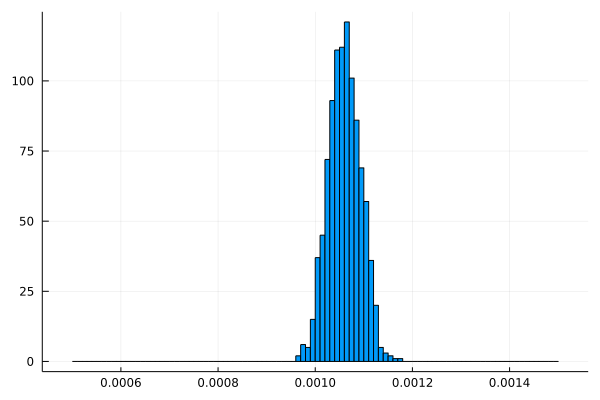

In [16]:
plot(birthday_distribution(1000),legend=false)

In [14]:
function birthday_problem_2(n)
    success = 0
    for t in 1:n
        months = @SVector [rand(1:12) for i in 1:20] # can use a static array (low number, up to 20-25)
        counts = [sum(months.==i) for i in 1:12]
        success += sum(counts.==2) == 4 && sum(counts.==3) == 4
    end
    success/n
end

birthday_problem_2 (generic function with 1 method)

In [15]:
@time birthday_problem_2(10_000_000)

  3.069412 seconds (34.33 M allocations: 3.089 GiB, 10.41% gc time)


0.0010664

In [6]:
function birthday_problem_3(n)
    success = 0
    for t in 1:n
        months = @SVector [rand(1:12) for i in 1:20] # can use a static array (low number, up to 20-25)
        counts = @SVector [sum(months.==i) for i in 1:12]
        success += sum(counts.==2) == 4 && sum(counts.==3) == 4
    end
    success/n
end

birthday_problem_3 (generic function with 1 method)

In [7]:
@time birthday_problem_3(10_000_000)

  1.159297 seconds


0.0010555

In [2]:
using FLoops

In [3]:
function birthday_problem_floop(t, ncores )

v = 0
  @floop ThreadedEx(basesize=t÷ncores) for _ in 1:t
       months =  @SVector [rand(1:12) for i in 1:20]
       counts =  @SVector [sum(months.==i) for i=1:12]
       success = sum(counts.==2) == 4  &&  sum(counts.==3)==4
       @reduce(v += success)           
  end
        
return v/t

end

birthday_problem_floop (generic function with 1 method)

In [24]:
@time birthday_problem_floop(100_000_000,16)

  1.908830 seconds (197 allocations: 12.609 KiB)


0.00106264